<h1 style="text-align: center;font-size: 40px;">Seattle Airbnb Analysis</h1>

## 1. Introduction
In this project, I explore the Seattle Airbnb dataset to uncover valuable insights about pricing trends, neighborhood popularity, and factors that influence listing prices. By analyzing this data, I aim to provide recommendations that can help both hosts and travelers make informed decisions. The findings could benefit hosts looking to optimize their pricing strategies and travelers seeking to understand market dynamics in Seattle.

## 2. Business Understanding
To guide the analysis, I focus on three key business questions:
1. Which neighborhoods are the most popular among travelers?
2. How do prices fluctuate based on time and location?
3. What factors influence listing prices the most?


### 3. Data Understanding

In [146]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd

# Load datasets
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

# Quick overview
print("Calendar Dataset")
display(calendar.head(), calendar.info())

print("Listings Dataset")
display(listings.head(), listings.info())

print("Reviews Dataset")
display(reviews.head(), reviews.info())


Calendar Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


None

Listings Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   ob

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


None

Reviews Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


None

I started by loading three datasets: calendar, listings, and reviews. These datasets contain information about booking prices, property details, and customer reviews. Here’s what I found:
- The calendar dataset contains daily price data for each listing.
- The listings dataset contains detailed information about properties, such as location and amenities.
- The reviews dataset includes guest feedback for each listing.

### 4. Prepare Data (Handling Missing Values)

In [150]:
# Step 2: Handle Missing Values
# -----------------------------
def handle_missing_values(df):
    """
    Handles missing values in the dataset.
    Fills numerical columns with the median and categorical with the mode.
    """
    # Handle numerical columns (fill with median)
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        df[column] = df[column].fillna(df[column].median())
    
    # Handle categorical columns (fill with mode)
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = df[column].fillna(df[column].mode()[0])

# Apply the function to handle missing values
handle_missing_values(listings)

# Verify if there are any remaining missing values
print("\nRemaining missing values after handling:")
print(listings.isnull().sum())


Remaining missing values after handling:
id                                  0
listing_url                         0
scrape_id                           0
last_scraped                        0
name                                0
                                   ..
cancellation_policy                 0
require_guest_profile_picture       0
require_guest_phone_verification    0
calculated_host_listings_count      0
reviews_per_month                   0
Length: 92, dtype: int64


To address missing data in the listings dataset, I created a function called handle_missing_values to ensure consistency and accuracy in the handling process. This function systematically dealt with missing values based on the type of data in each column. For numerical columns, such as those with float64 or int64 types, I filled the missing values with the column's median to avoid distorting the distribution of the data. For categorical columns, identified as object type, I replaced missing values with the mode (the most frequently occurring value) to maintain consistency in the data.

After defining the function, I applied it to the listings dataset to clean the data. Finally, I verified the results by checking for any remaining missing values using the isnull().sum() function. This step ensured that the dataset was complete and ready for further analysis, minimizing the potential impact of missing data on the results.

### 5. Cleaning and Preprocessing Columns for Neighborhood Price Analysis


Cleaned price column (first few entries):
0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64


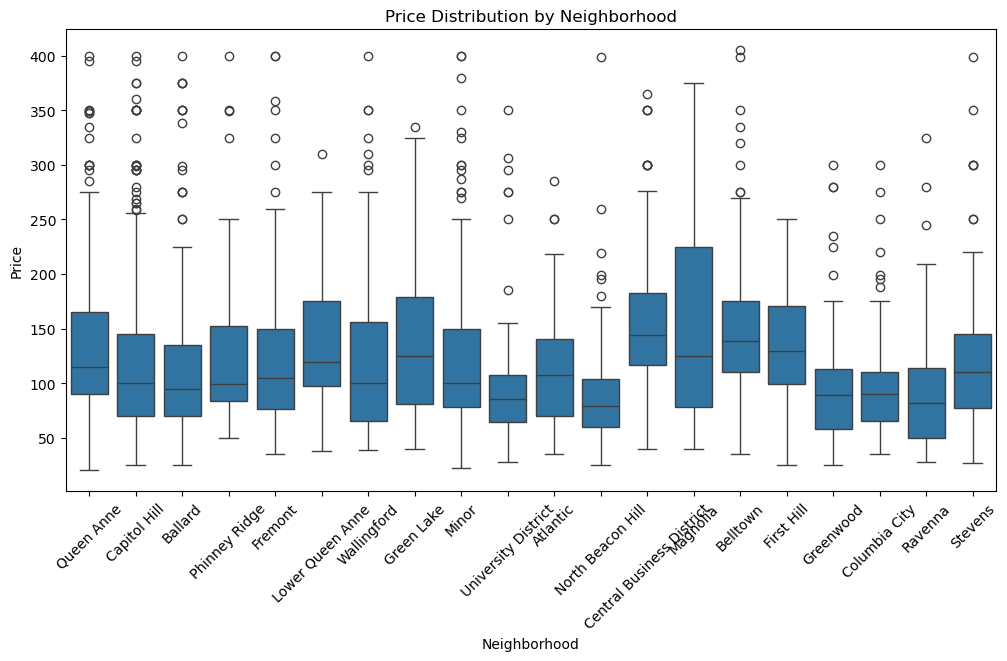

In [154]:
# Step 3: Clean and preprocess columns
# -----------------------------
# Clean the 'price' column by removing '$' and ',' and converting to float
listings['price'] = listings['price'].replace({'\\$': '', ',': ''}, regex=True)

# Convert to numeric, coercing any invalid values to NaN (which can later be handled)
listings['price'] = pd.to_numeric(listings['price'], errors='coerce')

# If there are missing values in 'price', fill them with the median
listings['price'] = listings['price'].fillna(listings['price'].median())

# Verify the cleaned 'price' column
print(f"\nCleaned price column (first few entries):\n{listings['price'].head()}")

# Step 1: Aggregate by Neighborhood and get the average price
neighborhood_price = listings.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

# Step 2: Filter out neighborhoods with a low number of listings
# For example, consider only neighborhoods with at least 50 listings
neighborhood_counts = listings['neighbourhood'].value_counts()
valid_neighborhoods = neighborhood_counts[neighborhood_counts >= 50].index
filtered_listings = listings[listings['neighbourhood'].isin(valid_neighborhoods)]

# Step 3: Remove extreme outliers from the price column (optional but recommended for better visuals)
# Here we remove values that are above 3 standard deviations
price_mean = filtered_listings['price'].mean()
price_std = filtered_listings['price'].std()
filtered_listings = filtered_listings[filtered_listings['price'] < (price_mean + 3 * price_std)]

# Step 4: Create the boxplot for price distribution by neighborhood
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood', y='price', data=filtered_listings)
plt.title('Price Distribution by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate neighborhood names for better readability
plt.show()

In this step, I cleaned the price column by removing $ and ,, converting it to numeric, and filling missing values with the median. I then calculated the average price per neighborhood, filtered neighborhoods with fewer than 50 listings, and removed outliers above three standard deviations. Finally, I visualized price distributions by neighborhood using a boxplot, rotating labels for better readability.

### 6. Exploratory Data Analysis (EDA)

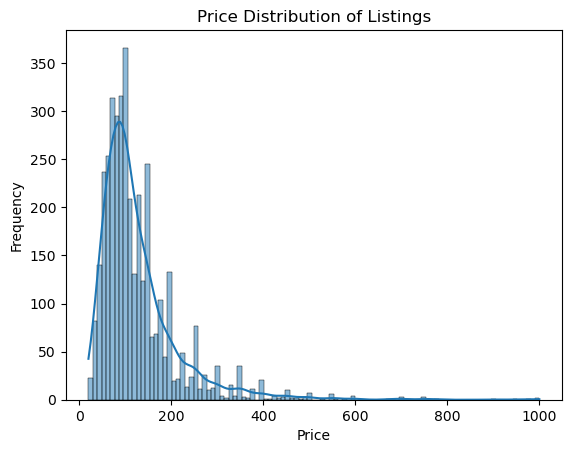

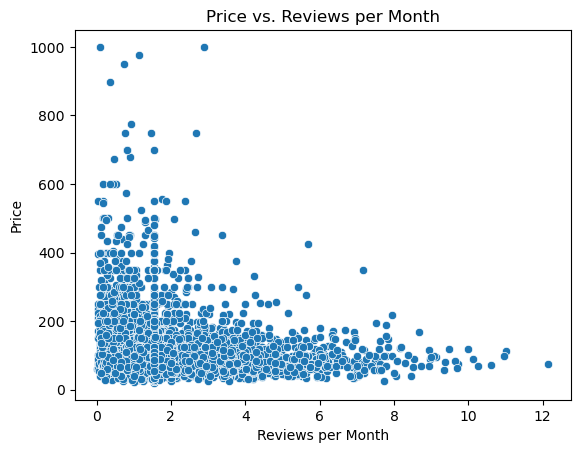

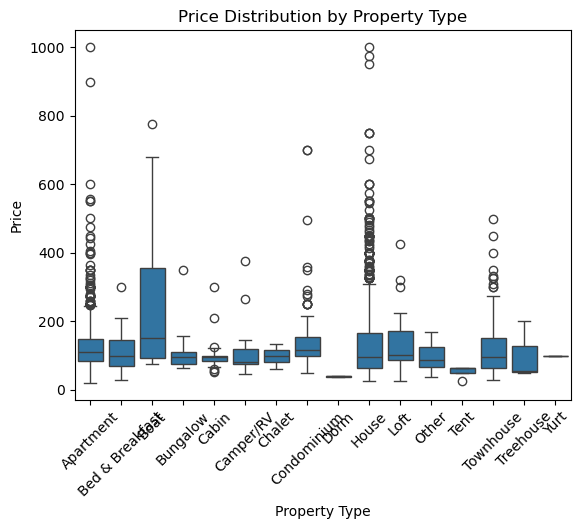

In [158]:
# Exploratory Data Analysis (EDA)
# -----------------------------
# Visualize the distribution of 'price' column
sns.histplot(listings['price'], kde=True)
plt.title('Price Distribution of Listings')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Visualize the relationship between 'reviews_per_month' and 'price'
sns.scatterplot(x='reviews_per_month', y='price', data=listings)
plt.title('Price vs. Reviews per Month')
plt.xlabel('Reviews per Month')
plt.ylabel('Price')
plt.show()

# Visualize the price distribution by property type
# Ensure 'property_type' is a valid categorical variable
listings['property_type'] = listings['property_type'].astype('category')

# Remove rows with missing 'property_type'
listings = listings[listings['property_type'].notna()]

# Create the boxplot for price by property type
sns.boxplot(x='property_type', y='price', data=listings)
plt.title('Price Distribution by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

This step focuses on understanding the data through visualizations. First, I analyzed the distribution of listing prices using a histogram with a kernel density estimate (KDE). Next, I explored the relationship between reviews_per_month and price using a scatterplot to identify trends or patterns. Then, I examined how prices varied by property type by creating a boxplot, ensuring the property_type column was treated as a valid categorical variable and removing any rows with missing values in this column. Labels were rotated for better readability in the visualizations.

### Evaluation

##### 1. Which neighborhoods are the most popular among travelers?

neighbourhood_cleansed
Broadway             397
Belltown             234
Wallingford          167
Fremont              158
Minor                135
                    ... 
Arbor Heights          5
Pinehurst              4
South Beacon Hill      4
South Park             3
Roxhill                2
Name: count, Length: 87, dtype: int64


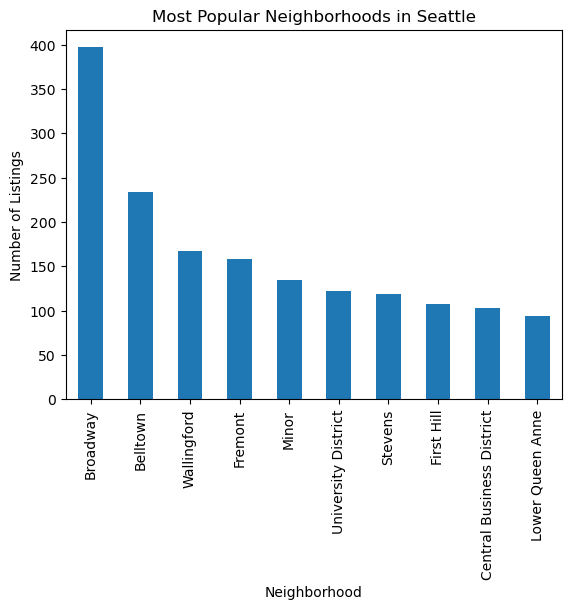

In [162]:
# Exploring the popularity of neighborhoods
neighborhood_counts = listings['neighbourhood_cleansed'].value_counts()
print(neighborhood_counts)

# Visualize the most popular neighborhoods
import matplotlib.pyplot as plt

neighborhood_counts.head(10).plot(kind='bar')
plt.title('Most Popular Neighborhoods in Seattle')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.show()

In this step, I explored the popularity of neighborhoods by analyzing the number of listings in each neighborhood. I used the value_counts() function to count the occurrences of each neighborhood in the listings dataset, which indicates the popularity of each neighborhood. I then visualized the top 10 most popular neighborhoods using a bar plot, showing the number of listings for each neighborhood. This helps identify which neighborhoods have the highest number of listings and are most likely favored by travelers.

#### 2. How do prices fluctuate based on time and location?

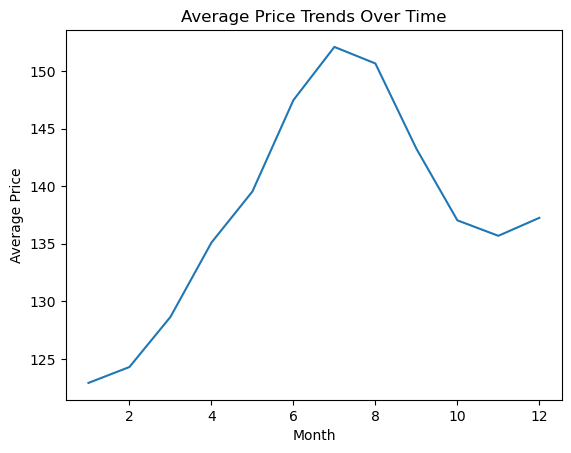

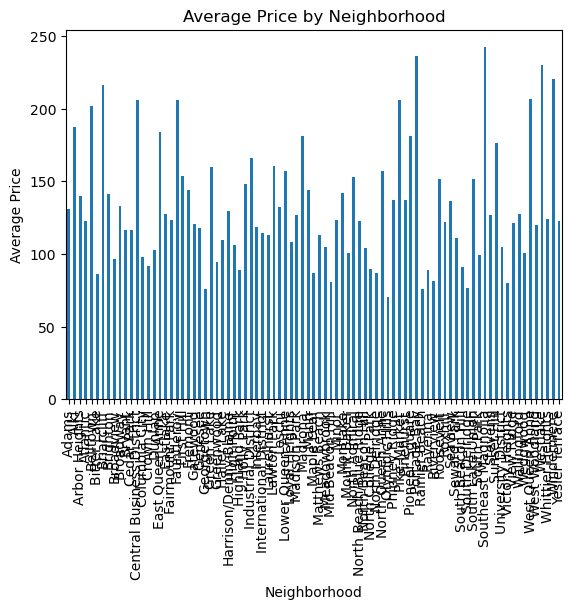

In [166]:
# Analyzing price trends over time
calendar['date'] = pd.to_datetime(calendar['date'])

# Clean price data and convert to float
calendar['price'] = calendar['price'].replace({r'\$': '', ',': ''}, regex=True).astype(float)

monthly_prices = calendar.groupby(calendar['date'].dt.month)['price'].mean()
monthly_prices.plot(kind='line', title='Average Price Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()

# Analyzing price by neighborhood
# Merge with 'neighbourhood_cleansed' from listings dataset
# Make sure 'id' exists in both calendar and listings before merging
neighborhood_prices = calendar.merge(listings[['id', 'neighbourhood_cleansed']], left_on='listing_id', right_on='id')

# Group by neighborhood and calculate average price
neighborhood_avg_prices = neighborhood_prices.groupby('neighbourhood_cleansed')['price'].mean()
neighborhood_avg_prices.plot(kind='bar', title='Average Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.show()

In this step, I analyzed how listing prices change over time and vary across different locations. First, I processed the calendar dataset by converting the date column to datetime format and cleaned the price data by removing dollar signs and commas, converting the values to floats. I then visualized price trends over the months, showing how prices fluctuate throughout the year with a line plot. Next, I merged the calendar data with the listings dataset based on the listing ID to analyze how prices vary across neighborhoods. I grouped the data by neighborhood and plotted the average price for each neighborhood in a bar chart, revealing location-based price variations.

### 3. What factors influence listing prices the most?

Model Coefficients: [ 5.32065610e+01 -1.92695462e+01 -1.43664718e+01  3.14140878e+00
  2.73260935e-02 -1.25738861e-01  1.29058425e+01 -4.91002108e-01
  1.28561201e+00 -1.06618417e-01 -1.04046260e+00  9.05456882e+00
 -1.09173837e+00 -7.23483293e-01  7.21563518e+00 -2.12247641e+00
 -1.53154272e+00 -5.03160723e-01  3.50995591e+00  2.87976148e+00
  3.02094294e-02  9.79028865e-02  6.47579570e+00  2.88283367e+00
  5.13518559e-01 -3.93253961e-01  1.75344970e-01  1.00705677e+00
 -2.19542889e+00 -2.30562873e+00  1.92528019e+00 -1.66839132e-01
 -7.81230026e-02  2.36207156e+00  4.05436600e+00  6.32055849e-01
  2.72638578e-01 -1.41306003e-01  1.26259979e+00 -1.63731955e-01
  5.13087403e+00  4.66750234e-02  1.89429403e+00  2.86104721e+00
  1.49381996e+00 -1.56524271e+00 -1.04264675e+00 -1.49951418e-01
 -1.64337487e+00  2.07338956e+00  3.41107699e+00 -1.24908654e+00
  2.25591833e+00 -5.58436128e-01 -1.10612730e+00 -1.10617448e+00
 -1.76596381e+00  5.19598141e-01 -4.80633369e-01 -6.59876862e-01
  5.2

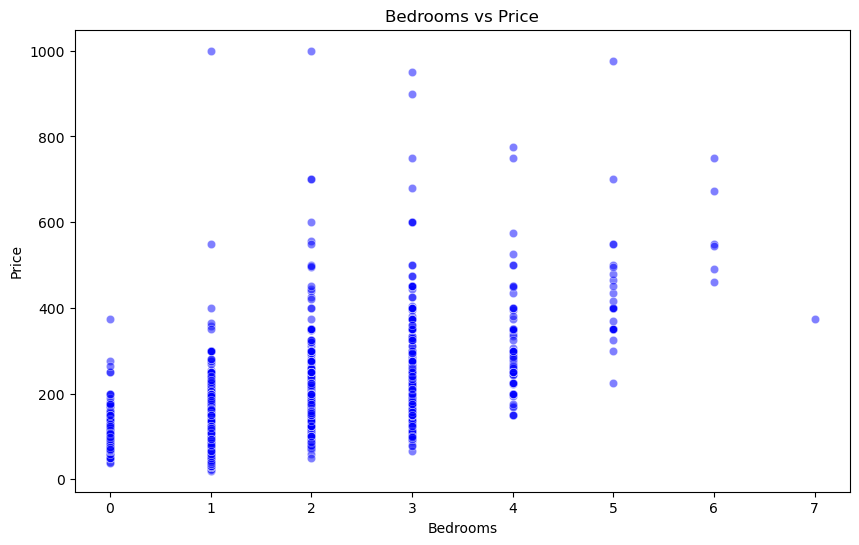

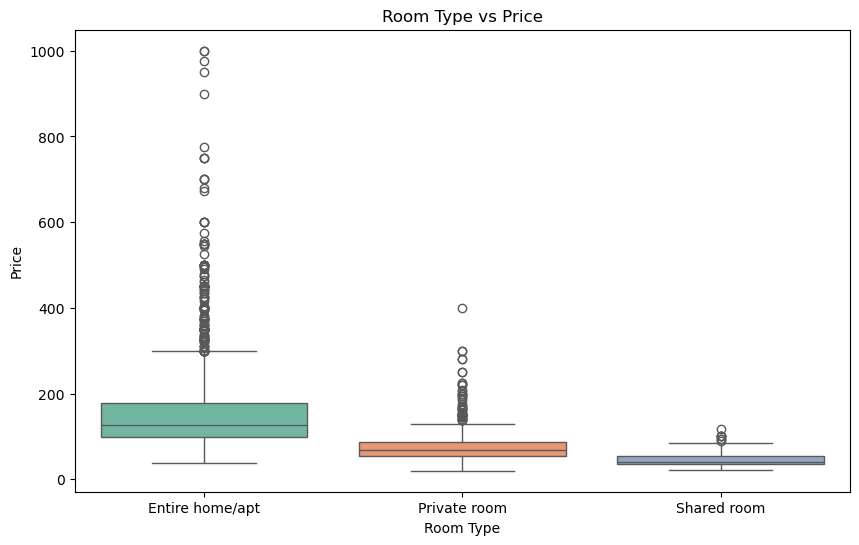

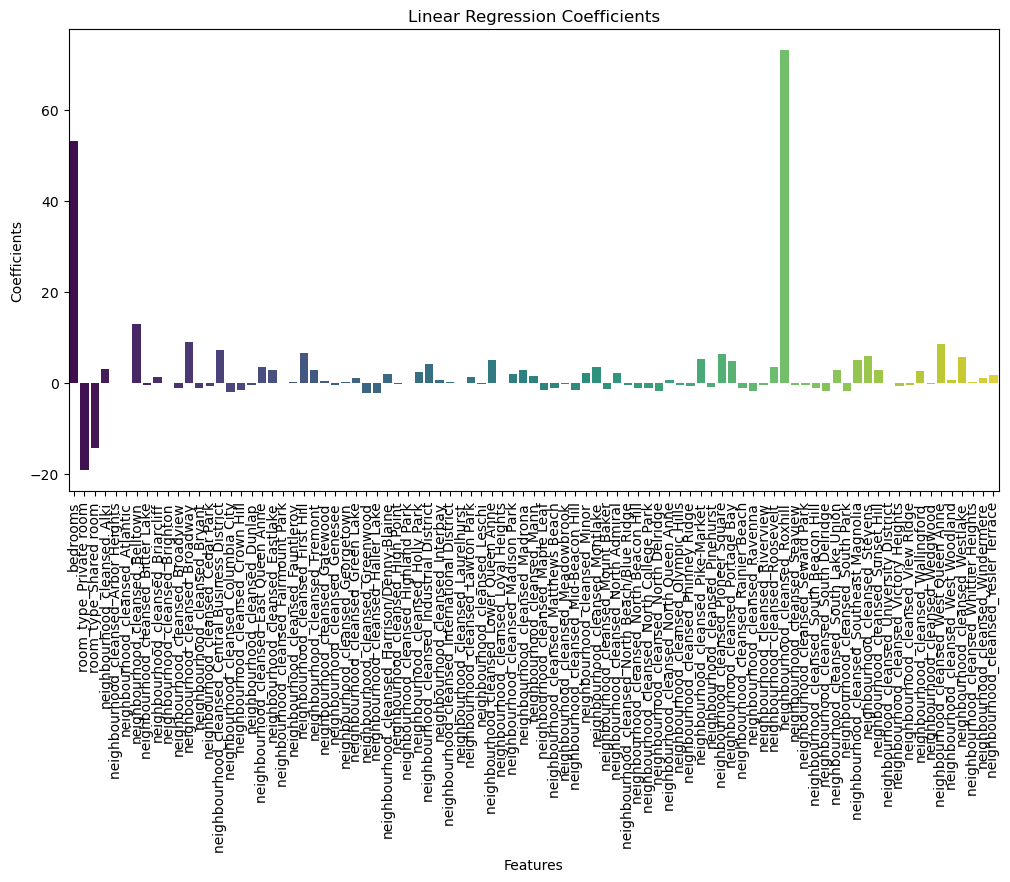

In [169]:
# Check for missing values and drop them
listings.dropna(subset=['room_type', 'bedrooms', 'neighbourhood_cleansed', 'price'], inplace=True)

# Selecting features to predict price
features = listings[['room_type', 'bedrooms', 'neighbourhood_cleansed']]  # Corrected column names
features = pd.get_dummies(features, drop_first=True)  # One-hot encode and drop first to avoid multicollinearity
target = listings['price']

# Scaling the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluating the model
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R^2 Score:", model.score(X_test, y_test))

# Scatter plot for 'bedrooms' vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=listings['bedrooms'], y=listings['price'], color='blue', alpha=0.5)
plt.title('Bedrooms vs Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

# Box plot for 'room_type' vs price
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=listings, hue='room_type', palette="Set2", legend=False)
plt.title('Room Type vs Price')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

# Bar plot for Model Coefficients
plt.figure(figsize=(12, 6))
coefficients = model.coef_
feature_names = features.columns
sns.barplot(x=feature_names, y=coefficients, hue=feature_names, palette="viridis", legend=False)
plt.title('Linear Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.xticks(rotation=90)
plt.show()


In this step i aimed in business question: "What factors influence listing prices the most?". I preprocessed the data by removing missing values in key columns (room_type, bedrooms, neighbourhood_cleansed, price). I selected relevant features and applied one-hot encoding to categorical variables, then standardized the features for better model performance. After splitting the data into training and test sets, I trained a Linear Regression model to predict prices. The model was evaluated using its coefficients and R-squared score. I also visualized the relationships between bedrooms, room_type, and price using scatter, box, and bar plots to gain insights into the factors that most affect listing prices.

### 7. Feature Selection and Preprocessing

In [173]:
#Feature Selection and Preprocessing
# -----------------------------
# Select relevant features for the model
features = ['reviews_per_month', 'availability_365', 'beds']
target = 'price'

# Drop rows with missing values in selected features
df_model = listings.dropna(subset=features + [target])

# X and y variables
X = df_model[features]
y = df_model[target]

In this step, I identified the relevant features (reviews_per_month, availability_365, and beds) to predict the target variable (price). Rows with missing values in these features or the target variable were removed to ensure the dataset was clean and suitable for modeling. Finally, I separated the data into feature variables (X) and the target variable (y) for further analysis and modeling.

### 8. Model Training and Evaluation

In [178]:
# Model Training and Evaluation
# -----------------------------
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'\nMean Squared Error: {mse}')


Mean Squared Error: 5315.172490236058


I trained a Linear Regression model to predict listing prices. The dataset was split into training (80%) and testing (20%) sets. The model was trained on the training data and used to make predictions on the test set. Its performance was evaluated using the Mean Squared Error (MSE), which quantifies prediction accuracy. The MSE value was displayed to assess the model's effectiveness.

### 9. Plot Predicted vs. Actual Prices

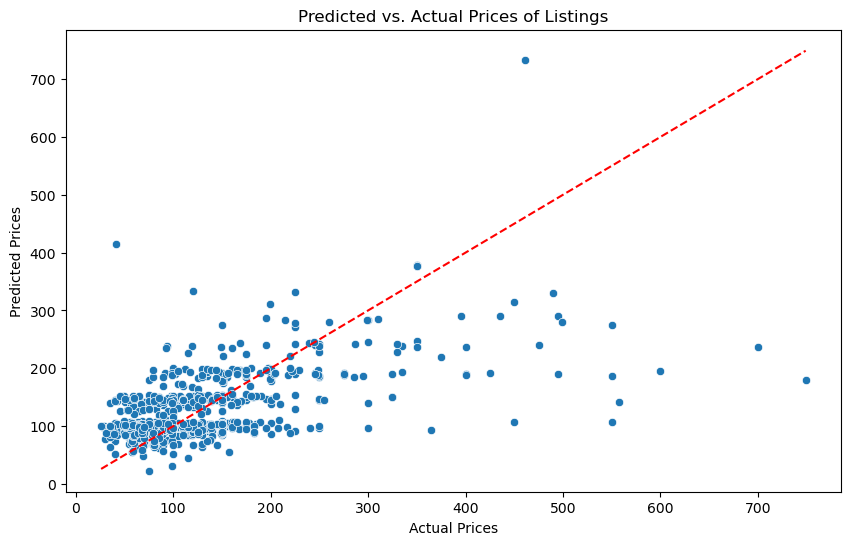

In [182]:
# Plot Predicted vs. Actual Prices
# -----------------------------
# Create a DataFrame with the actual and predicted prices
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot the actual vs. predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=comparison_df)
plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         [comparison_df['Actual'].min(), comparison_df['Actual'].max()], color='red', linestyle='--')
plt.title('Predicted vs. Actual Prices of Listings')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

To evaluate the performance of the Linear Regression model visually, I plotted the actual prices of listings against the predicted prices. A scatterplot was created, with a red dashed line representing the ideal scenario where predicted prices perfectly match actual prices. This plot helps identify how well the model captures the relationship between features and listing prices.